**Predicting Bike Rental Demand**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
bike_df = pd.read_csv('https://raw.githubusercontent.com/jesford/bike-sharing/master/train.csv')
print(bike_df.shape)
bike_df.head(3)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


* datetime - year-month-day-min-sec
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter  
* holiday - 1 = weekends/holidays, 0 = work days
* workingday - 1 = work days, 0 = weekends/holidays
* weather 
    - 1: sunny 
    - 2: cloudy 
    - 3: snow flurries, light rain and light thunder 
    - 4: heavy snow/rain, thunder  
* casual - non-registered ppl renting  
* registered - registered ppl renting
* count - number of rentals

In [ ]:
bike_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
 bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
#date time is in object, so will change it to datetime format
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)
bike_df['datetime']
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [ ]:
#separating year, month, day, hour
bike_df["year"] = bike_df['datetime'].dt.year 
bike_df["month"] = bike_df['datetime'].dt.month 
bike_df["day"] = bike_df['datetime'].dt.day 
bike_df["hour"] = bike_df['datetime'].dt.hour 
bike_df.shape

(10886, 16)

[Text(0.5, 0, 'hour'), Text(0.5, 1.0, 'Hour')]

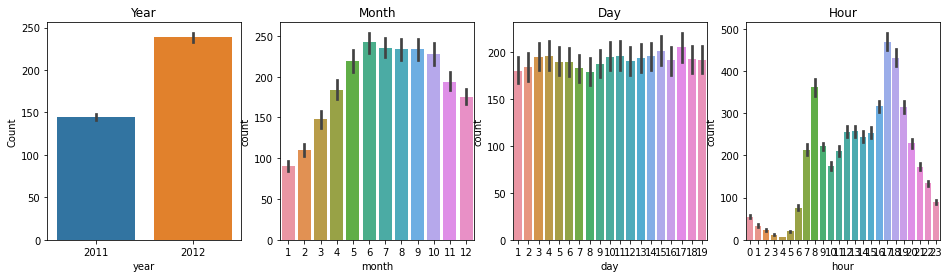

In [ ]:
#Visualization of the number of rents according to time using subplot
figure, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4)
figure.set_size_inches(16,4)

sns.barplot(data=bike_df, x="year", y="count", ax=ax1)
sns.barplot(data=bike_df, x="month", y="count", ax=ax2)
sns.barplot(data=bike_df, x="day", y="count", ax=ax3)
sns.barplot(data=bike_df, x="hour", y="count", ax=ax4)

ax1.set(ylabel='Count',title="Year")
ax2.set(xlabel='month',title="Month")
ax3.set(xlabel='day', title="Day")
ax4.set(xlabel='hour', title="Hour")

**Analysis from the 4 graphs above**
- The annual rental amount was higher in 2012 than in 2011. Perhaps it is due to word of mouth.
- The monthly rental volume is highest in June, followed by July, August, September, and October, followed by May. It seems to be rented out a lot when the weather is warm.
- The daily rental amount only exists from the 1st to the 19th.
- Looking at the hourly rental volume, the most frequent rentals are between 7 and 8 am and 18:00 pm, which is likely to be linked to commute times.  

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Working Day'), Text(0.5, 1.0, 'Weekday')]

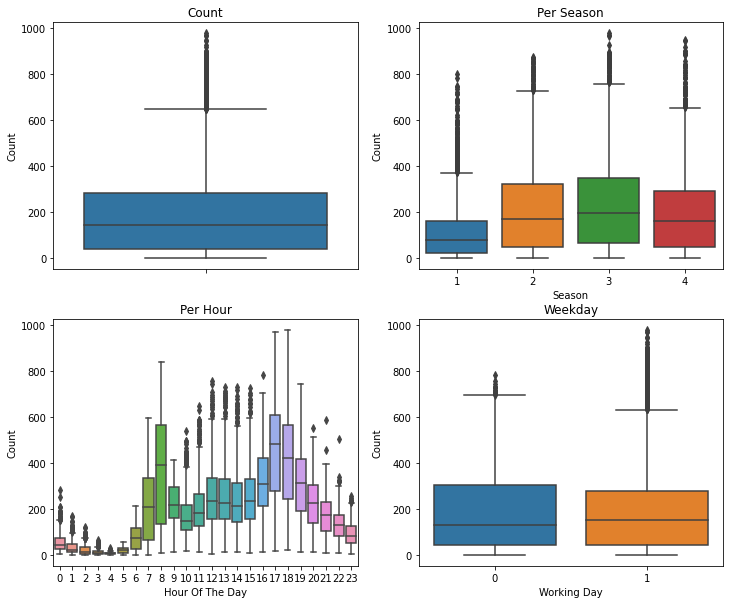

In [ ]:
# Visualization of rental per season, weekdays and hour
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2)

fig.set_size_inches(12, 10)
sns.boxplot(data=bike_df, y="count",orient="v",ax=ax1)
sns.boxplot(data=bike_df, y="count",x="season",orient="v",ax=ax2)
sns.boxplot(data=bike_df, y="count",x="hour",orient="v",ax=ax3)
sns.boxplot(data=bike_df, y="count",x="workingday",orient="v",ax=ax4)

ax1.set(ylabel='Count',title="Count")
ax2.set(xlabel='Season', ylabel='Count',title="Per Season")
ax3.set(xlabel='Hour Of The Day', ylabel='Count',title="Per Hour")
ax4.set(xlabel='Working Day', ylabel='Count',title="Weekday")

Let's say this was in a city where it has all 4 seasons in normal order. For season(chart 2), 1 refers to spring, 2 for summer, 3 is autumn, and 4 means winter. The lowest number of rentals in a year is spring. More info such as specific location would be needed to make an justifiable assumption. 
According to 4th chart Weekday, 0 means weekends and 1 means weekdays. Bicycle rentals tend to be higher on weekends than on weekdays, which is quite reasonable to say because people would more likely to ride bike for fun during weekends as well.

In [ ]:
# Visualization of rentals per day
bike_df["dayofweek"] = bike_df["datetime"].dt.dayofweek
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek,daysinaweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5,5


In [ ]:
bike_df["dayofweek"].value_counts() 
# 0=monday, 1=tuesday, 2=wednesday, 3=thursday, 4=friday, 5=saturday, 6=sunday

5    1584
6    1579
3    1553
0    1551
2    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

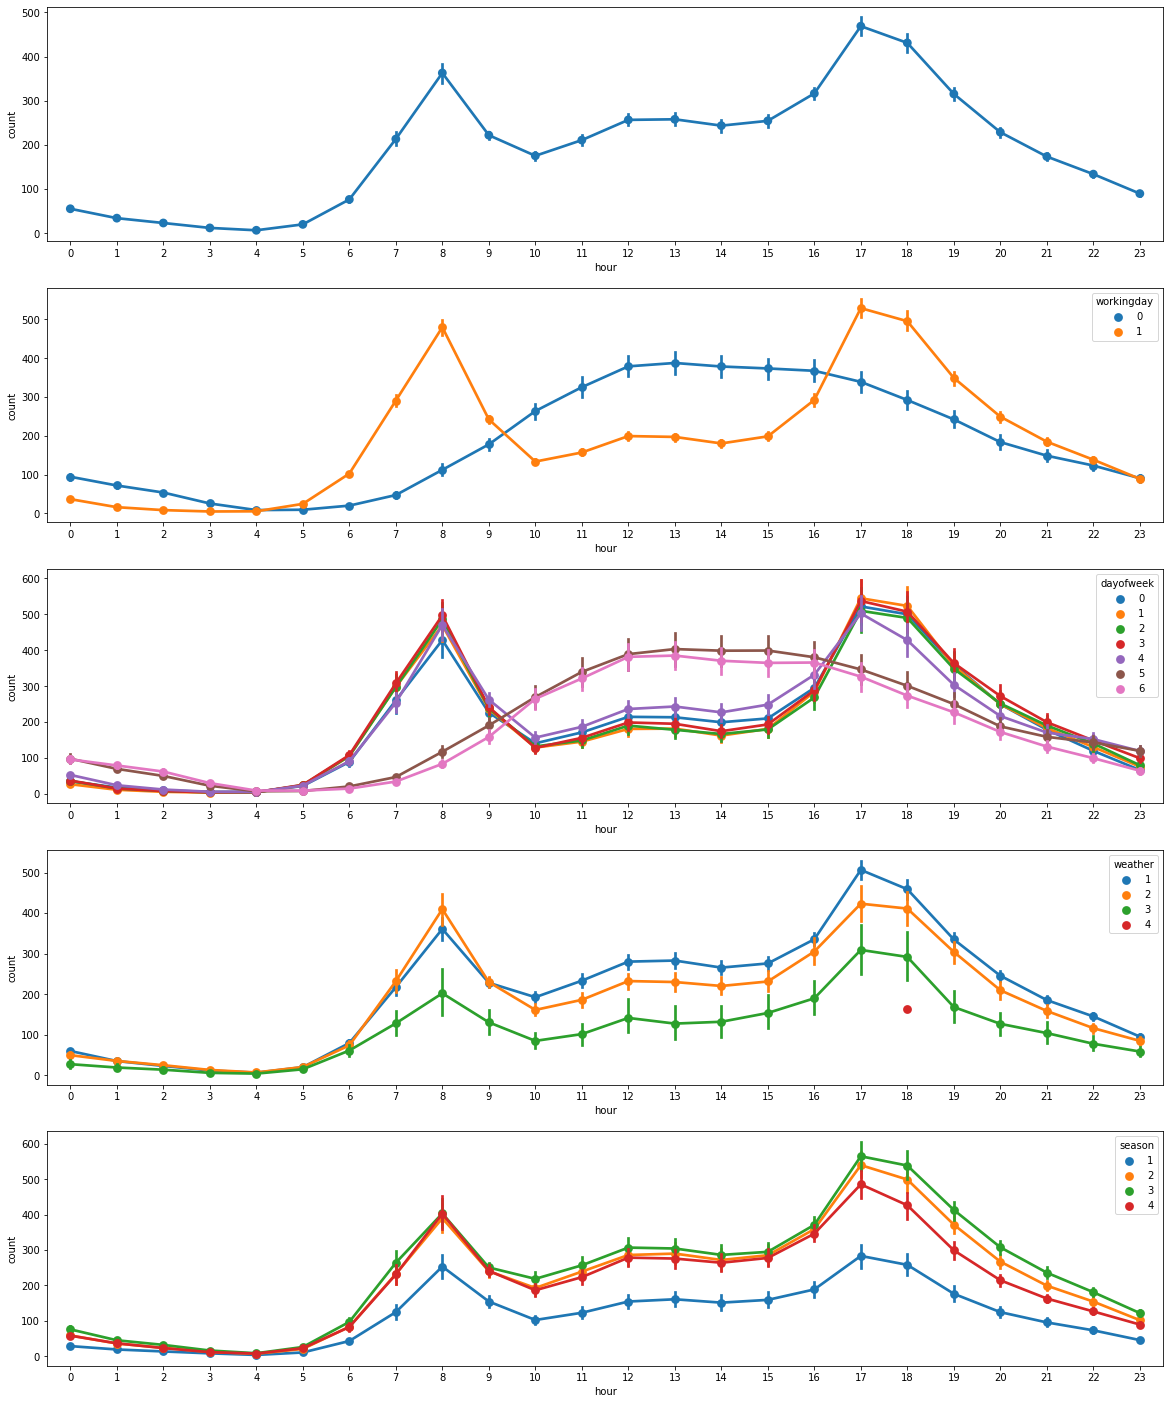

In [ ]:
# Plots of rentals per hour
fig, (ax1, ax2, ax3, ax4, ax5)= plt.subplots(nrows=5)
fig.set_size_inches(20,25)

sns.pointplot(data=bike_df, x="hour", y="count", ax=ax1)
sns.pointplot(data=bike_df, x="hour", y="count", hue="workingday", ax=ax2)
sns.pointplot(data=bike_df, x="hour", y="count", hue="dayofweek", ax=ax3)
sns.pointplot(data=bike_df, x="hour", y="count", hue="weather", ax=ax4)
sns.pointplot(data=bike_df, x="hour", y="count", hue="season", ax=ax5)

We've already been informed of the first and fifth graph from previous blox plot.

For the second graph, on weekdays, there is a lot of rental volume during commute hour when there's a lot of traffic. On weekends, the rental volume is higher for the afternoon peaking at 5pm. 

From the third graph which is based on different days, weekdays and weekend trends tend to go against each other, where weekends rentals mount to peak in the early afternoon while on weekdays, there's a sharp distinction on peak commute hours. We could assume a lot of people are doing something fun riding the bike.

For the fourth graph which is the rental amount by weather, we can see people barely ride bike during snows or rains.

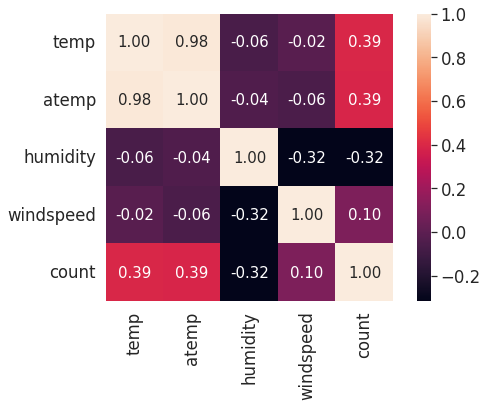

In [ ]:
# Finding correlation
cols = ["temp", "atemp", "humidity", "windspeed", "count"]
corr = bike_df[cols].corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols,
            xticklabels=cols)

plt.tight_layout()
plt.show()

Atemp and temp have a high correlation with each other at 0.98, but it is safe to say that the meaning of these two data is virtually the same as the temperature and the perceived temperature correlates to each other. 
Windspeed is at 0.10 which shows there's very low correlation to people renting bikes.

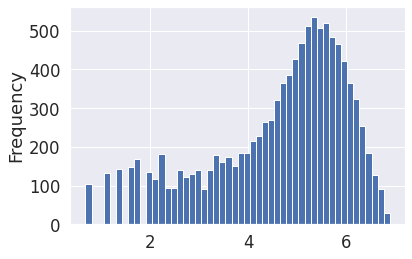

In [ ]:
# Normal distribution of 'count'
y_log_transform = np.log1p(bike_df['count'])
y_log_transform.plot(kind='hist', bins=50)

In [ ]:
#Building bike rental prediction model with Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

train = pd.read_csv('https://raw.githubusercontent.com/jesford/bike-sharing/master/train.csv', parse_dates=["datetime"])

In [ ]:
# Generate year, month, day, hour columns
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour

In [ ]:
# Delete unnecessary columns
#casual, registered columns reveal the answers
drop_columns = ['datetime', 'casual', 'registered'] 
#axis는 열을 1개씩 삭제한단 의미
train.drop(drop_columns, axis=1, inplace=True) 

In [ ]:
#Separate 'count' column (number of rentals) which is the one we have to predict 
y_target = train['count']
#train에는 그대로 카운트 잇는데 xfeatures에는 카운트가 없다
x_features = train.drop(['count'], axis=1, inplace=False) 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size = .3, random_state=777)

In [ ]:
#RMSLE
def rmsle(y, pred):

    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

#RMSE
from sklearn.metrics import mean_squared_error
def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

#Getting RMSE, RMSLE both
def calculate_model_score(y, pred):
    rmsle_value = rmsle(y, pred)
    rmse_value = rmse(y, pred)
    print(f'RMSLE: {rmsle_value:.3f}, RMSE: {rmse_value:.3f}')

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

calculate_model_score(y_test, pred)

RMSLE: 1.157, RMSE: 143.207


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log1p
  """


In [ ]:
#To lower the RMSLE / RMSE - normal distribution
y_log_transform = np.log1p(y_target)

# Data has changed so separate them again
x_train, x_test, y_train, y_test = train_test_split(x_features, y_log_transform,
                                                   test_size = .3,
                                                   random_state = 777)

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [ ]:
#to un log the y
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

calculate_model_score(y_test_exp, pred_exp)

RMSLE: 1.011, RMSE: 162.942


In [ ]:
#Make dummy variables for year and season (categorical variable)
x_features_dummy_test = pd.get_dummies(x_features, columns = ['year', 'season'])
x_features_dummy_test

,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,day,hour,year_2011,year_2012,season_1,season_2,season_3,season_4
0,0,0,1,9.84,14.395,81,0.0000,1,1,0,1,0,1,0,0,0
1,0,0,1,9.02,13.635,80,0.0000,1,1,1,1,0,1,0,0,0
2,0,0,1,9.02,13.635,80,0.0000,1,1,2,1,0,1,0,0,0
3,0,0,1,9.84,14.395,75,0.0000,1,1,3,1,0,1,0,0,0
4,0,0,1,9.84,14.395,75,0.0000,1,1,4,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,1,15.58,19.695,50,26.0027,12,19,19,0,1,0,0,0,1
10882,0,1,1,14.76,17.425,57,15.0013,12,19,20,0,1,0,0,0,1
10883,0,1,1,13.94,15.910,61,15.0013,12,19,21,0,1,0,0,0,1
10884,0,1,1,13.94,17.425,61,6.0032,12,19,22,0,1,0,0,0,1


In [ ]:
x_features_dummy = pd.get_dummies(x_features,
                               columns = ['year', 'month', 'day', 'hour', 'holiday', 'workingday', 'season', 'weather'])

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

#un log
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

calculate_model_score(y_test_exp, pred_exp)

RMSLE: 1.011, RMSE: 162.942


In [ ]:
#Visualization on different weighs
coefs = pd.DataFrame(zip(x_features_dummy.columns, lr.coef_), columns = ['feature', 'coefficients'])
coefs = coefs.sort_values(by=['coefficients'], ascending=False).reset_index(drop=True)

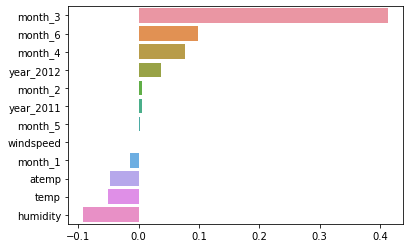

In [ ]:
import seaborn as sns

sns.barplot(x=coefs['coefficients'][:20].values, y=coefs['feature'][:20].values) 
#top 20 recalled

In [ ]:
#Data normalization using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
count_scaled = scaler.fit_transform(train['count'].values.reshape(-1, 1))

# Add this scaled column to the df
train.insert(0, 'count_scaled', count_scaled)
train

,count_scaled,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,-0.969294,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0
1,-0.836797,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1
2,-0.880962,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2
3,-0.985856,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3
4,-1.052104,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0.797333,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19
10882,0.272866,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20
10883,-0.130146,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21
10884,-0.345454,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


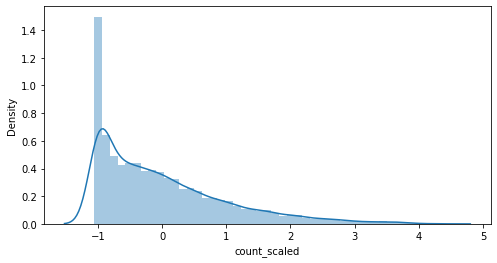

In [ ]:
plt.figure(figsize=(8, 4))
sns.distplot(train['count_scaled'])

In [ ]:
y_target = train['count_scaled']
x_features = train.drop(['count','count_scaled'], axis=1, inplace=False)

x_features_dummy = pd.get_dummies(x_features,
                               columns = ['year', 'month', 'day', 'hour', 'holiday', 'workingday', 'season', 'weather'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_features_dummy, y_target, test_size = .3)

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

print(lr.score(x_test, y_test))
print(lr.score(x_train, y_train)) 
#the number didn't change much so no need to do normalization

0.6938473355683088
0.6938705210757689


In [ ]:
# Find outlier in humidity column which has high correlation w/ count
fraud = train['humidity']

quantile_25 = np.percentile(fraud.values, 25)
quantile_75 = np.percentile(fraud.values, 75)

iqr = quantile_75 - quantile_25
iqr_weight = iqr * 1.5

lowest_val = quantile_25 - iqr_weight
highest_val = quantile_75 + iqr_weight

# Filter the outlier and save the index
outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
outlier_index

Int64Index([1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101,
            1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112],
           dtype='int64')

In [ ]:
train.drop(outlier_index, axis=0, inplace=True)
len(train)

10864

In [ ]:
y_target = train['count']
x_features = train.drop(['count'], axis=1, inplace=False)
x_features_dummy = pd.get_dummies(x_features,
                               columns = ['year', 'month', 'day', 'hour', 'holiday', 'workingday', 'season', 'weather'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_features_dummy, y_target, test_size=.3, random_state=777)

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
print(lr.score(x_test, y_test))
print(lr.score(x_train, y_train)) 
#model has improved a lot by dropping outliers

1.0
1.0
